In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
import pandas as pd
import geopandas as gpd
import numpy as np
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import LinearSegmentedColormap

In [2]:
bdmap = gpd.read_file('map/seats.shp')
bdmap.head()

,seat_no,seat,district,division,region,shape_len,shape_area,geometry
0,1,Panchagarh-1,Panchagarh,Rangpur,Urban,2.787812,0.061199,"POLYGON ((88.72746 26.34527, 88.72772 26.34494..."
1,2,Panchagarh-2,Panchagarh,Rangpur,Rural,1.411258,0.064286,"POLYGON ((88.76158 26.30059, 88.76176 26.29971..."
2,3,Thakurgaon-1,Thakurgaon,Rangpur,Urban,1.255212,0.058832,"POLYGON ((88.55589 26.17948, 88.55684 26.17788..."
3,4,Thakurgaon-2,Thakurgaon,Rangpur,Rural,1.858839,0.045806,"POLYGON ((88.32191 26.20205, 88.3222 26.20129,..."
4,5,Thakurgaon-3,Thakurgaon,Rangpur,Rural,1.810654,0.059069,"POLYGON ((88.25475 26.03583, 88.25828 26.03391..."


In [3]:
# get 2026 election data
df = pd.read_csv('https://raw.githubusercontent.com/muhallilahnaf/election-2026-live/master/data/seat_votes_pa.csv')
df.head()

,seat_no,name,vote,party,alliance,seat,district,division,region,voters,male_voters,female_voters,thirdgender_voters,time,vote_pc
0,95,কপিল কৃষ্ণ মন্ডল,114323,BNP,BNP,Bagerhat-1,Bagerhat,Khulna,Rural,375560.0,190838.0,184720.0,2.0,2026-02-14 14:42:37.115645+00:00,30.44
1,95,মোঃ মশিউর রহমান খান,117527,Jamaat,Jamaat-NCP,Bagerhat-1,Bagerhat,Khulna,Rural,375560.0,190838.0,184720.0,2.0,2026-02-14 14:42:37.115645+00:00,31.29
2,96,শেখ মোহাম্মদ জাকির হোসেন,66409,BNP,BNP,Bagerhat-2,Bagerhat,Khulna,Urban,338009.0,167739.0,170265.0,5.0,2026-02-14 14:42:37.115645+00:00,19.65
3,96,শেখ মনজুরুল হক (রাহাদ),117709,Jamaat,Jamaat-NCP,Bagerhat-2,Bagerhat,Khulna,Urban,338009.0,167739.0,170265.0,5.0,2026-02-14 14:42:37.115645+00:00,34.82
4,97,শেখ ফরিদুল ইসলাম,103711,BNP,BNP,Bagerhat-3,Bagerhat,Khulna,Rural,266864.0,132350.0,134510.0,4.0,2026-02-14 14:42:37.115645+00:00,38.86


In [10]:
# get dhaka results
df_dhk = df[df.district=='Dhaka']
df_dhk.alliance.unique()

array(['BNP', 'Jamaat-NCP'], dtype=object)

In [48]:
dfc = pd.read_csv('data/candidates_2026.csv')
dfc.head()

,name,src,party,name_bn,seat_no,symbol,alliance,seat,district,division
0,Md. Aminul Islam,md_aminul_islam_bagerhat_1.jpg,AB Party,মোঃ আমিনুল ইসলাম,95,ঈগল,NaN,Bagerhat-1,Bagerhat,Khulna
1,Kapil Krishna Mandal,kapil_krishna_mandal_bagerhat_1.jpg,BNP,কপিল কৃষ্ণ মন্ডল,95,ধানের শীষ,BNP,Bagerhat-1,Bagerhat,Khulna
2,A. Sabur Sheikh,a_sabur_sheikh_bagerhat_1.jpg,Bangladesh Muslim League,আঃ সবুর শেখ,95,হাত (পাঞ্জা),NaN,Bagerhat-1,Bagerhat,Khulna
3,M. A. H. Selim,m_a_h_selim_bagerhat_1.jpg,Independent,এম এ এইচ সেলিম,95,ঘোড়া,NaN,Bagerhat-1,Bagerhat,Khulna
4,Md. Sheikh Masud Rana,md_sheikh_masud_rana_bagerhat_1.jpg,Independent,মোঃ শেখ মাছুদ রানা,95,ফুটবল,NaN,Bagerhat-1,Bagerhat,Khulna


In [49]:
# calculate vote gap between BNP and Jamaat-NCP alliance
vote_gap = {}
for seat in df_dhk.seat.unique().tolist():
    vote_bnp = df_dhk[(df_dhk.seat==seat) & (df_dhk.alliance=='BNP')]['vote'].iloc[0]
    vote_jncp = df_dhk[(df_dhk.seat==seat) & (df_dhk.alliance=='Jamaat-NCP')]['vote'].iloc[0]
    name_bnp = dfc[(dfc.seat==seat) & (dfc.alliance=='BNP')]['name'].iloc[0]
    name_jncp = dfc[(dfc.seat==seat) & (dfc.alliance=='Jamaat-NCP')]['name'].iloc[0]
    gap = vote_bnp-vote_jncp
    name = name_jncp if gap < 0 else name_bnp
    vote_gap[seat] = {
        'gap': gap,
        'name': name
    }
    
# sort gap data
sorted_gap = sorted(vote_gap.items(), key=lambda x: x[1]['gap'])
sorted_gap = dict(sorted_gap)

# convert gap data to df for merging
df_dhk_vg = pd.DataFrame.from_dict(sorted_gap, orient='index').reset_index()
df_dhk_vg.columns = ['seat', 'vote_gap', 'name']
df_dhk_vg.head()

,seat,vote_gap,name
0,Dhaka-12,-22810,Md. Saiful Alam
1,Dhaka-15,-21614,Dr. Md. Shafiqur Rahman
2,Dhaka-14,-17790,Mir Ahmad Binqasem
3,Dhaka-5,-9150,Mohammed Kamal Hossain
4,Dhaka-16,-3361,Md. Abdul Baten


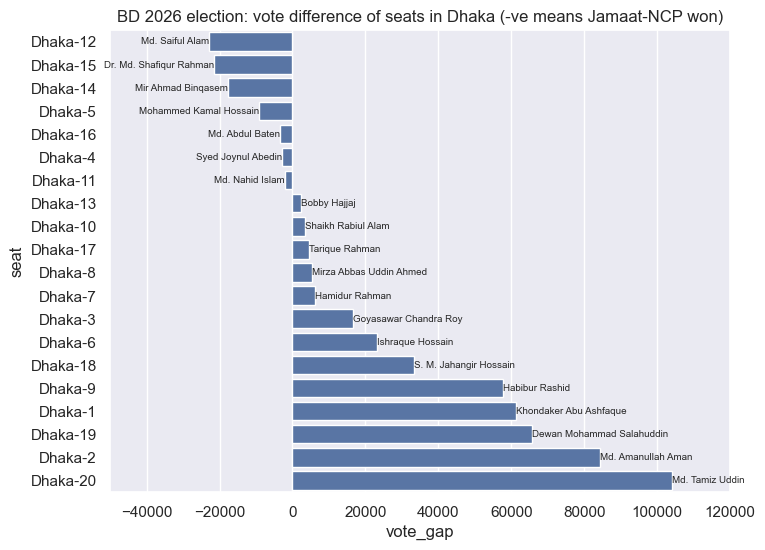

In [53]:
# plot close contests
fig, ax = plt.subplots(figsize=(8, 6))
sns.barplot(data=df_dhk_vg, x='vote_gap', y='seat', orient='horizontal', ax=ax)
ax.bar_label(ax.containers[0], labels=df_dhk_vg['name'], fontsize=7)
ax.set_xlim(-50000, 120000) 
ax.set_title('BD 2026 election: vote difference of seats in Dhaka (-ve means Jamaat-NCP won)')
fig.savefig('fig/election_2026_dhaka_vote_difference',bbox_inches='tight')

In [54]:
map_dhk = pd.merge(bdmap, df_dhk_vg, how='inner', on='seat')[['seat', 'vote_gap', 'geometry']]
map_dhk.head()

,seat,vote_gap,geometry
0,Dhaka-1,61159,"POLYGON ((90.15996 23.74899, 90.1616 23.74695,..."
1,Dhaka-2,84365,"POLYGON ((90.33718 23.755, 90.33629 23.75268, ..."
2,Dhaka-3,16553,"POLYGON ((90.40703 23.69274, 90.40673 23.69214..."
3,Dhaka-4,-2920,"POLYGON ((90.45403 23.65177, 90.45284 23.65029..."
4,Dhaka-5,-9150,"POLYGON ((90.48601 23.74844, 90.48696 23.74749..."


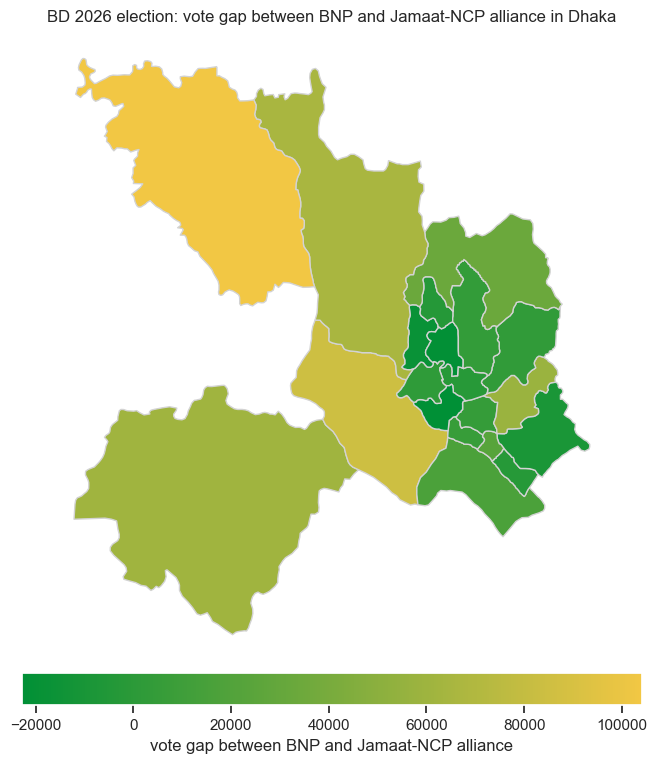

In [59]:
# plot map
fig, ax = plt.subplots(figsize=(8, 14))
divider = make_axes_locatable(ax)
cax = divider.append_axes("bottom", size="5%", pad=0.1)

cmap = LinearSegmentedColormap.from_list(
    'mycmap', [(0, '#009036'), (1, '#F2C744')])

map_dhk.plot(
    column='vote_gap', 
    cmap=cmap, 
    edgecolor='lightgrey',
    legend=True, 
    ax=ax,
    cax=cax,
    legend_kwds={
        'label': 'vote gap between BNP and Jamaat-NCP alliance',
        'orientation': 'horizontal'
    }
)
ax.set_axis_off()
ax.title.set_text("BD 2026 election: vote gap between BNP and Jamaat-NCP alliance in Dhaka")
fig.savefig('fig/election_2026_map_dhaka_vote_difference',bbox_inches='tight')

In [66]:
df_ncp = df[df.party=='NCP'].sort_values(by='vote')
df_ncp_named = pd.merge(df_ncp[['seat', 'party', 'vote', 'vote_pc']], dfc, how='left', on=['seat', 'party'])
df_ncp_named.head()

,seat,party,vote,vote_pc,name,src,name_bn,seat_no,symbol,alliance,district,division
0,Bandarban,NCP,26162,NaN,Abu Saeed Md. Sujauddin,abu_saeed_md_sujauddin_bandarban.jpg,এস এম সুজা উদ্দিন,300,শাপলা কলি,NaN,Bandarban,Chittagong
1,Pirojpur-3,NCP,36610,15.17,Md. Shamim Hamidi,md_shamim_hamidi_pirojpur_3.jpg,মোঃ শামীম হামিদী,129,শাপলা কলি,Jamaat-NCP,Pirojpur,Barisal
2,Dhaka-9,NCP,53460,11.39,Mohammad Javed Mia,mohammad_javed_mia_dhaka_9.jpg,মোহাম্মদ জাবেদ মিয়া,182,শাপলা কলি,Jamaat-NCP,Dhaka,Dhaka
3,Dhaka-8,NCP,54127,19.65,Muhammad Nasiruddin Patwary,muhammad_nasiruddin_patwary_dhaka_8.jpg,মুহাম্মাদ নাসীরুদ্দীন পাটওয়ারী,181,শাপলা কলি,Jamaat-NCP,Dhaka,Dhaka
4,Dhaka-20,NCP,56343,14.96,Nabila Tasnid,nabila_tasnid_dhaka_20.jpg,নাবিলা তাসনিদ,193,শাপলা কলি,Jamaat-NCP,Dhaka,Dhaka


In [69]:
df_ncp_named = df_ncp_named[~df_ncp_named['name'].isna()]

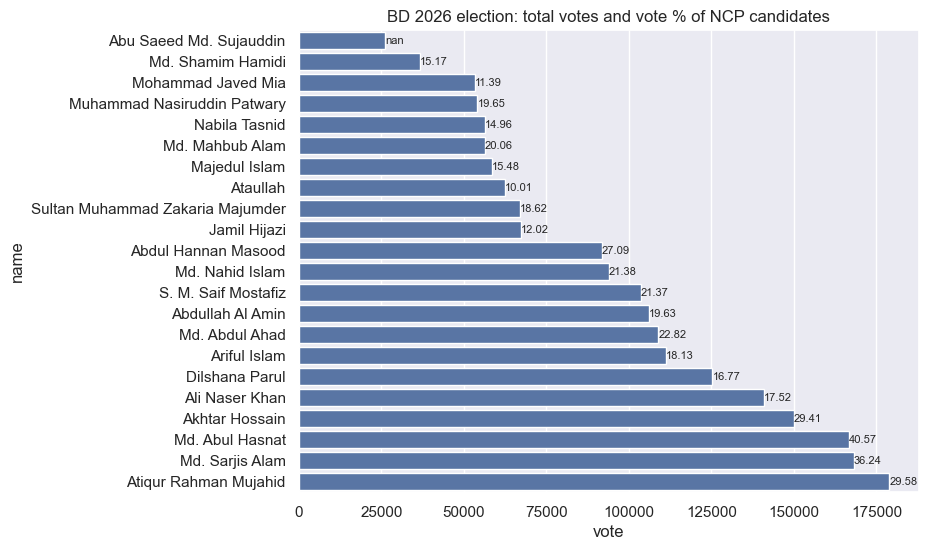

In [70]:
# plot NCP candidates vote and vote %
fig, ax = plt.subplots(figsize=(8, 6))
sns.barplot(data=df_ncp_named, x='vote', y='name', orient='horizontal', ax=ax)
ax.bar_label(ax.containers[0], labels=df_ncp_named['vote_pc'], fontsize=8)
ax.set_title('BD 2026 election: total votes and vote % of NCP candidates')
fig.savefig('fig/election_2026_ncp_candidates',bbox_inches='tight')

In [5]:
# get 2026 election party data
dfp = pd.read_csv('https://raw.githubusercontent.com/muhallilahnaf/election-2026-live/master/data/party_votes_pa.csv')
dfp.head()

,party,vote,voters,seat_contested,avg_vote_pc,total_vote_pc,count,alliance
0,AB Party,187560,1275015.0,3,14.71,0.15,NaN,Jamaat-NCP
1,BJP,105543,406567.0,1,25.96,0.08,1.0,BNP
2,BNP,36453458,119719132.0,281,30.45,28.86,208.0,BNP
3,Bangladesh Development Party,124249,773191.0,2,16.07,0.10,NaN,Jamaat-NCP
4,Bangladesh Islami Front,194873,1640640.0,4,11.88,0.15,NaN,no alliance


In [6]:
dfpp = pd.read_csv('data/party_result.csv')
dfpp.head()

,year,party,votes,votes_pc,seats
0,1991,BNP,10507549,30.81,140
1,1991,AL,10259866,30.08,88
2,1991,Jamaat,4136661,12.13,18
3,1991,JaPa,4063537,11.92,35
4,1991,BAKSAL,616014,1.81,5


In [7]:
dfp['year'] = 2026
dfp = dfp[['year', 'party', 'vote', 'total_vote_pc', 'count']].rename(
    columns={'vote': 'votes', 'total_vote_pc': 'votes_pc', 'count': 'seats'})

dfp.head()

,year,party,votes,votes_pc,seats
0,2026,AB Party,187560,0.15,NaN
1,2026,BJP,105543,0.08,1.0
2,2026,BNP,36453458,28.86,208.0
3,2026,Bangladesh Development Party,124249,0.10,NaN
4,2026,Bangladesh Islami Front,194873,0.15,NaN


In [39]:
dfs = pd.read_csv('data/election_summary.csv')
dfs.head()

,year,valid,invalid,total,registered,turnout_pc
0,1991,34103677,374026,34477703,62181743,55.45
1,1996,42418274,462302,42880576,56716935,75.60
2,2001,55736625,449082,56185707,74946364,74.97
3,2008,70012191,636294,70648485,81087003,87.13


In [45]:
dfss = df.groupby('seat').agg({'vote': 'sum', 'voters': 'first'})
total_vote_2026 = dfss.vote.sum()
total_voter_2026 = dfss.voters.sum()
turnout_2026 = round(total_vote_2026 / total_voter_2026 * 100, 2)
print(turnout_2026)

53.21


In [47]:
turnout = dfs.turnout_pc.tolist() + [turnout_2026]
turnout

[55.45, 75.6, 74.97, 87.13, 53.21]

In [27]:
bigp = ['BNP', 'AL', 'Jamaat']

In [50]:
dfpm = pd.concat([dfp, dfpp])
dfpm = dfpm[dfpm.party.isin(bigp)]
dfpm_pivot = dfpm.pivot(index='year', columns='party', values='votes_pc').reset_index()
dfpm_pivot['turnout_pc'] = turnout
dfpm_pivot.head()

party,year,AL,BNP,Jamaat,turnout_pc
0,1991,30.08,30.81,12.13,55.45
1,1996,37.44,33.61,8.61,75.60
2,2001,40.13,40.97,4.28,74.97
3,2008,48.04,32.50,4.70,87.13
4,2026,NaN,28.86,18.01,53.21


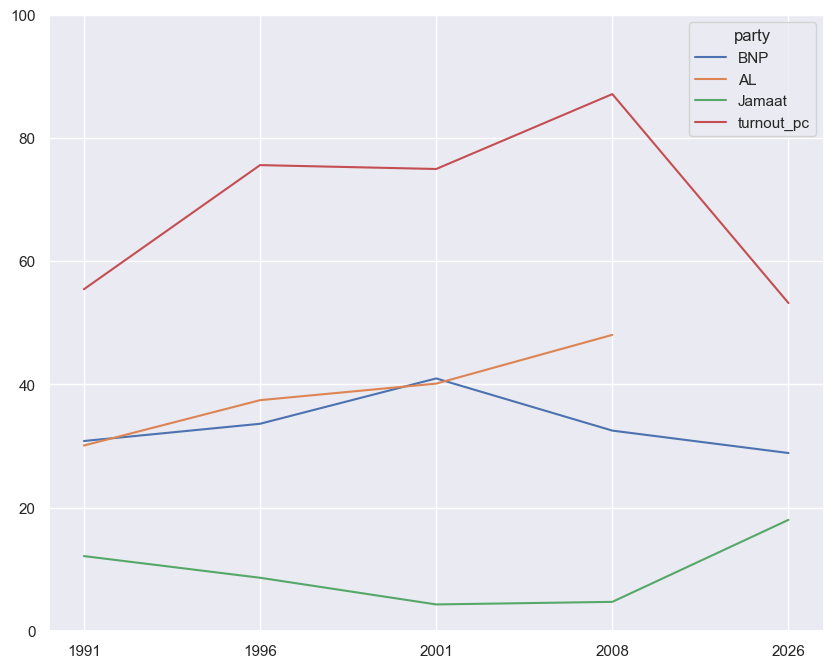

In [53]:
# plot line chart
dfpm_pivot.year = dfpm_pivot.year.map(str)

fig, ax = plt.subplots(figsize=(10, 8))
dfpm_pivot.plot.line(ax=ax, y=bigp)
dfpm_pivot.plot.line(y='turnout_pc', ax=ax)
ax.set_xticks(ticks=range(len(dfpm_pivot.index)), labels=dfpm_pivot.year.tolist())
ax.set_ylim([0, 100])
fig.savefig('fig/election_2026_bigp_votepc_turnout',bbox_inches='tight')